### Plot HRU at different complexity levels ###

In [1]:
import os
import numpy as np
import rasterio as rio
import geopandas as gpd
import geospatial_functions.utils as ut
import geospatial_functions.geospatial_plot as gp

In [2]:
# common paths
control_file = 'control_active.txt'
root_path = ut.read_from_control(control_file, 'root_path')
source_path = ut.read_from_control(control_file, 'source_path')
domain_name = ut.read_from_control(control_file, 'domain_name')
domain_path = os.path.join(root_path, domain_name)
plot_path = os.path.join(domain_path, 'plot')

In [5]:
# domain data
domain_gru_prj_shp = ut.specify_file_path(control_file, 'domain_gru_prj_shp')
gruNo_field = ut.read_from_control(control_file, 'gruNo_field')
domain_stream_shp = ut.specify_file_path(control_file, 'domain_stream_shp')  
domain_dem_raster = ut.specify_file_path(control_file, 'domain_dem_raster')  

elev_class_field = ut.read_from_control(control_file,'elev_class_field')           # field name of the elevation class column in HRU. 
land_class_field = ut.read_from_control(control_file,'land_class_field')           # field name of the land class column in HRU. 
radiation_class_field = ut.read_from_control(control_file,'radiation_class_field') # field name of the radiation class column in HRU. 

#### Define HRU complexity levels ####
level 0: GRU = HRU. <br>
level 1: use only elevation bands in HRU generation.<br>
level 2a: use elevation bands and landcover classes in HRU generation.<br>
level 2b: use elevation bands and radiation classes in HRU generation.<br>
level 3a: use elevation bands, radiation bands, landcover classes in HRU generation.<br>
level 3b: nested. radiation bands are generated based on level 2a HRU.<br>

In [7]:
level_list = ['0','1','2a','2b','3a','3b']

#### Plot HRU ####

--- Complexity level 0 ---


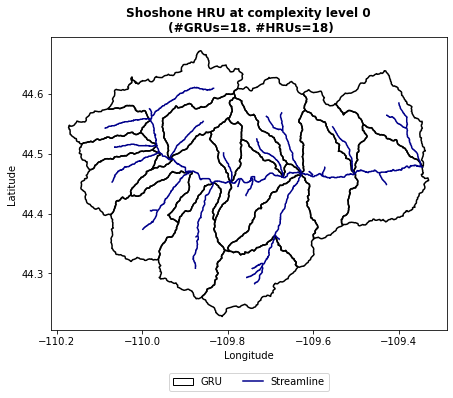

--- Complexity level 1 ---


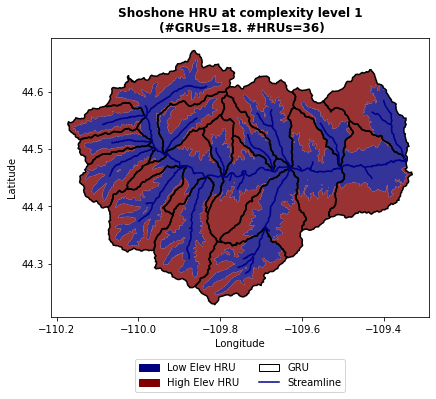

--- Complexity level 2a ---


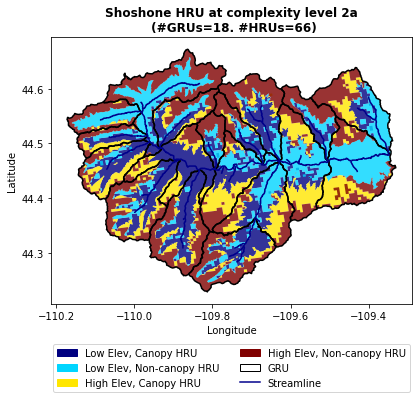

--- Complexity level 2b ---


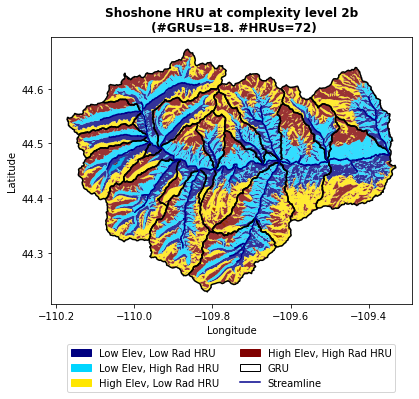

--- Complexity level 3a ---


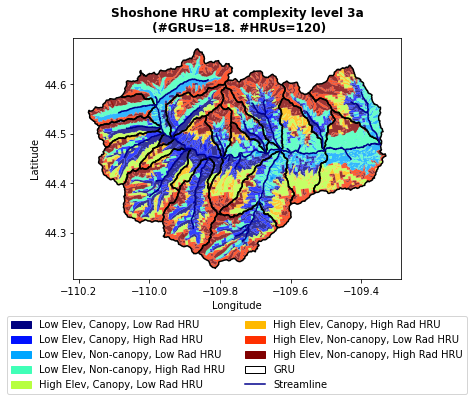

--- Complexity level 3b ---


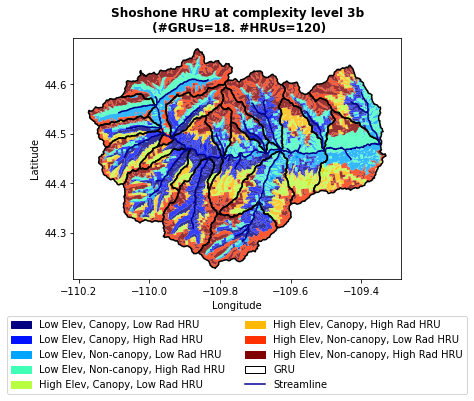

In [9]:
for level in level_list:

    print('--- Complexity level %s ---' %(level))

    # specification plot inputs
    hru_str = 'hru'+'_lev' + str(level)
    hru_elmn_str = hru_str+'_elmn'     

    hru_vector = os.path.join(domain_path, hru_str+'.shp')
    hru_vector_elmn = os.path.join(domain_path, hru_elmn_str+'.shp')    
    
    ofile = os.path.join(domain_path, 'plot', hru_str+'.png')   
    ofile_elmn = os.path.join(domain_path, 'plot', hru_elmn_str+'.png')      
       
    wgs_crs = 'epsg:4326' # projection used for plot
    figsize=(9,9*0.6)
    title = domain_name.capitalize()+' HRU'
    leg_ncol=2
    leg_loc='upper center'
    leg_bbox_to_anchor=(0.5,-0.13)

    # fieldname_list: a list of field names corresponding to the inputs that are used to define HRU (except GRU input).
    # input_dict: a dictionary defining each hru_type corresponding plot color and label. 
    # When cmap_str is 'user', input_dict follows the format: dict[hru_type]=list(color,label). 
    # For example, input_dict = {1:["black", "Low Elev HRU"], 2:["white", "High Elev HRU"]}.     
    # When cmap_str is a Python built-in colormap (eg, 'jet'), input_dict follows the format: dict[hru_type]=label. 
    # For example, input_dict = {1: "Low Elev HRU", 2: 'High Elev HRU'}.   

    cmap_str='jet'
    if level == '0':
        fieldname_list = [] 
        input_dict = []
    elif level == '1':
        fieldname_list = [elev_class_field] 
        input_dict={'1': "Low Elev HRU",
                    '2': "High Elev HRU"} 
    elif level == '2a':
        fieldname_list = [elev_class_field, land_class_field] 
        input_dict={'11': "Low Elev, Canopy HRU",
                    '12': "Low Elev, Non-canopy HRU",
                    '21': 'High Elev, Canopy HRU',
                    '22': 'High Elev, Non-canopy HRU'} 
    elif level == '2b':
        fieldname_list = [elev_class_field, radiation_class_field] 
        input_dict={'11': "Low Elev, Low Rad HRU",
                    '12': "Low Elev, High Rad HRU",
                    '21': 'High Elev, Low Rad HRU',
                    '22': 'High Elev, High Rad HRU'} 
    elif level == '3a' or level == '3b':
        fieldname_list = [elev_class_field, land_class_field, radiation_class_field] 
        input_dict={'111': "Low Elev, Canopy, Low Rad HRU",
                    '112': "Low Elev, Canopy, High Rad HRU",
                    '121': "Low Elev, Non-canopy, Low Rad HRU",
                    '122': "Low Elev, Non-canopy, High Rad HRU",
                    '211': 'High Elev, Canopy, Low Rad HRU',
                    '212': 'High Elev, Canopy, High Rad HRU',
                    '221': 'High Elev, Non-canopy, Low Rad HRU',
                    '222': 'High Elev, Non-canopy, High Rad HRU'} 

    level_str, hru_shp, gru_shp, stream_shp, wgs_crs, fieldname_list, cmap_str, input_dict,\
    figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
    level, hru_vector_elmn, domain_gru_prj_shp, domain_stream_shp, wgs_crs, fieldname_list, cmap_str, input_dict,\
    figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile
    
    # plot
    gp.plot_hru(level_str, hru_shp, gru_shp, stream_shp, wgs_crs, fieldname_list, cmap_str, input_dict,\
    figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)
